### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [20]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [24]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f"Trying {descent_name}...")
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

Trying full...
Trying stochastic...
Trying momentum...
Trying adam...


In [25]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [1]:
!pip3 install scikit-learn

In [129]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [130]:
data = pd.read_csv('autos.csv')

In [131]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

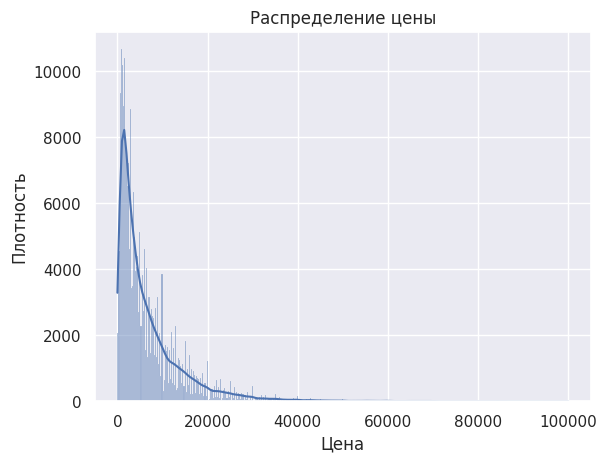

In [132]:
sns.histplot(data['price'], kde=True)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Плотность')

plt.show()

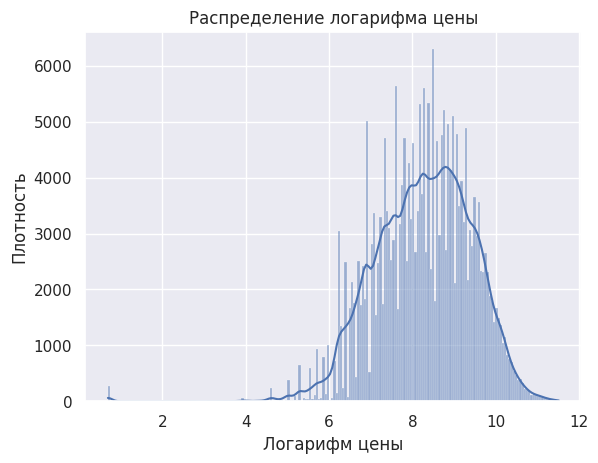

In [133]:
data['log_price'] = np.log1p(data['price'])

sns.histplot(data['log_price'], kde=True)
plt.title('Распределение логарифма цены')
plt.xlabel('Логарифм цены')
plt.ylabel('Плотность')

plt.show()



Да, здесь судя по всему присутствуют выбросы. Можно попробовать построить ящики с усами: 

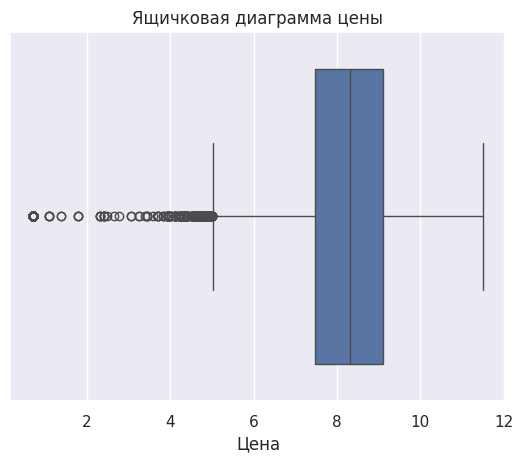

In [134]:
sns.boxplot(x=data['log_price'])
plt.title('Ящичковая диаграмма цены')
plt.xlabel('Цена')
plt.show()

In [135]:
Q1 = data['log_price'].quantile(0.25)
Q3 = data['log_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['log_price'] >= lower_bound) & (data['log_price'] <= upper_bound)]

print('Нижняя граница:', lower_bound, 'Верхняя граница:', upper_bound)
print('Исходное количество записей:', data.shape[0])
print('Количество записей без выбросов:', filtered_data.shape[0])


Нижняя граница: 5.012386046237095 Верхняя граница: 11.560536142367114
Исходное количество записей: 241190
Количество записей без выбросов: 240399


In [136]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric =  ['powerPS', 'kilometer', 'autoAgeMonths', 'price']
other = []

Попытаемся выявить завиcимости

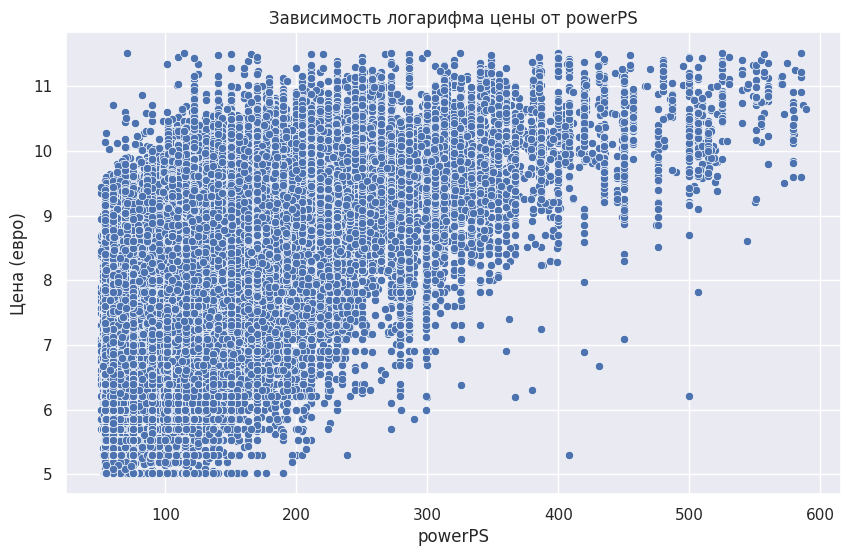

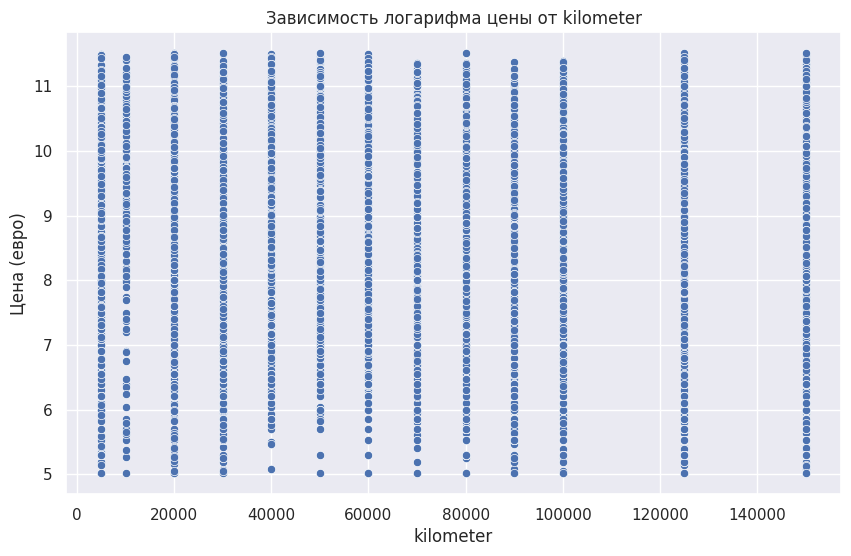

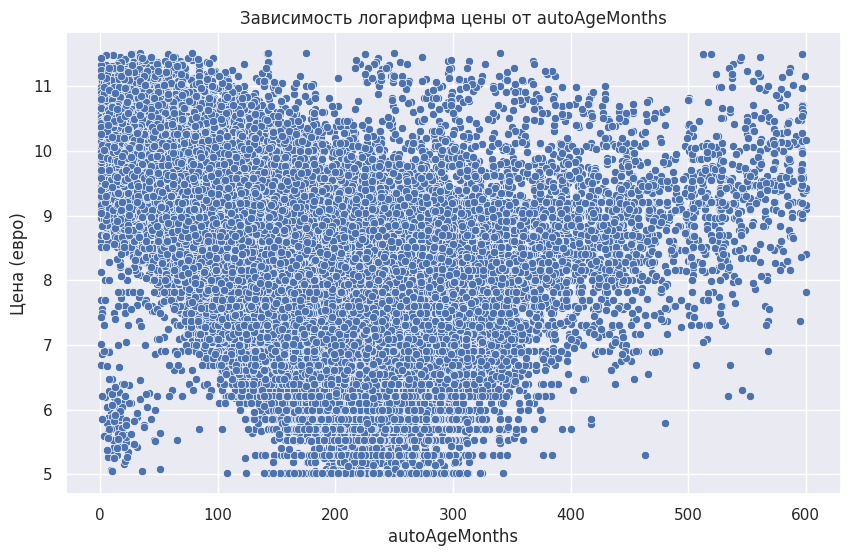

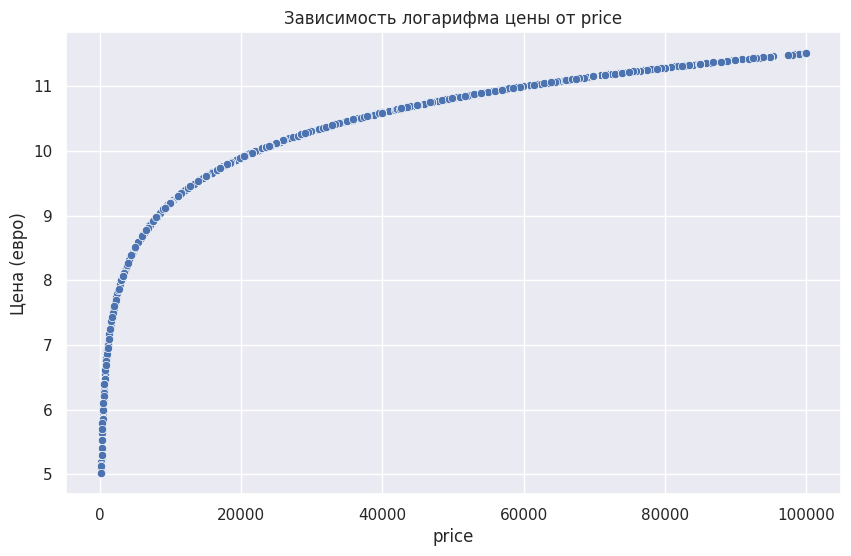

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(column_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column_name, y='log_price', data=filtered_data)
    plt.title(f'Зависимость логарифма цены от {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Цена (евро)')
    plt.show()

for column in numeric:
    plot_scatter(column)


Можно сказать, что мощность как-то влияет только если прям уж совсем мощные автомобили (более 340-400 лс).
Также как и возраст автомобиля - снижает стоимость, при чем совсем уж новые машины стоят дороже. 

А вот километраж - не понятно. Судя по линиям, километраж округляется в датасете до каких-то порогов, но изза плотности, не видно что там происходит на каждом пороге. 

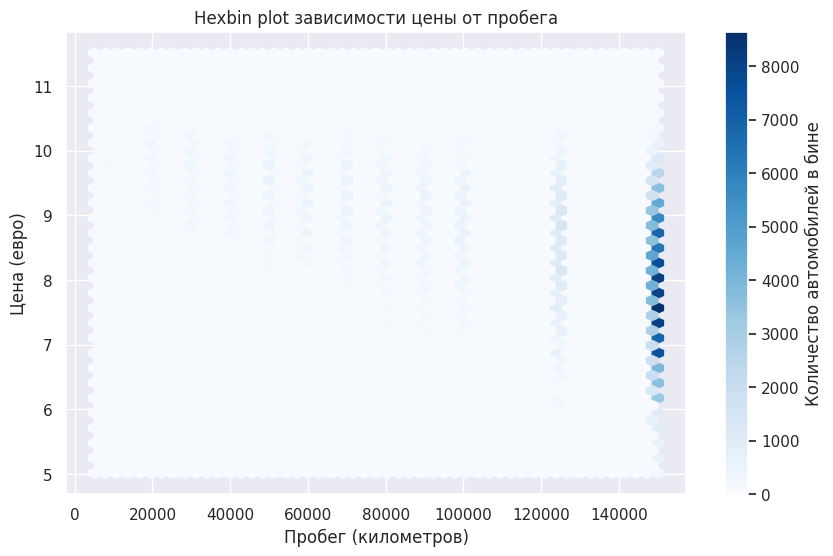

In [139]:
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_data['kilometer'], filtered_data['log_price'], gridsize=50, cmap='Blues')
plt.colorbar(label='Количество автомобилей в бине')
plt.xlabel('Пробег (километров)')
plt.ylabel('Цена (евро)')
plt.title('Hexbin plot зависимости цены от пробега')
plt.show()

судя по бину, видно что в датасете очень много машин с большим пробегом и низкой ценой. 

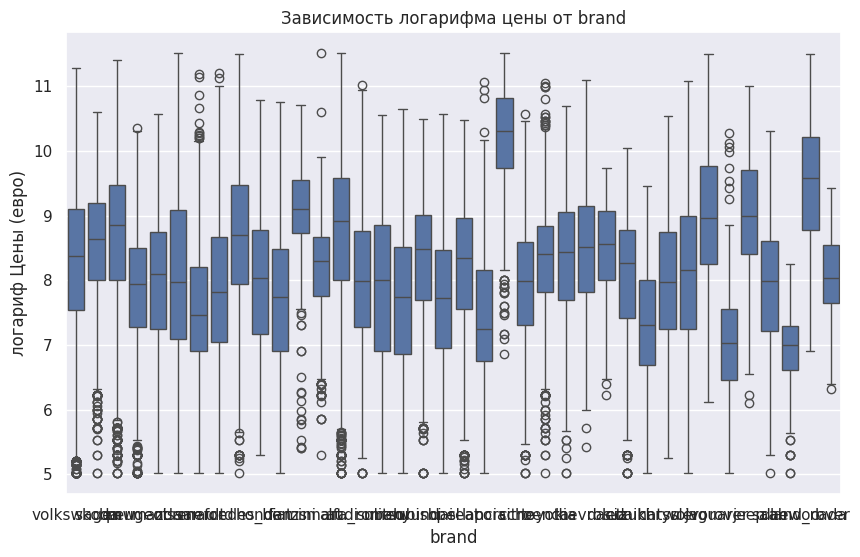

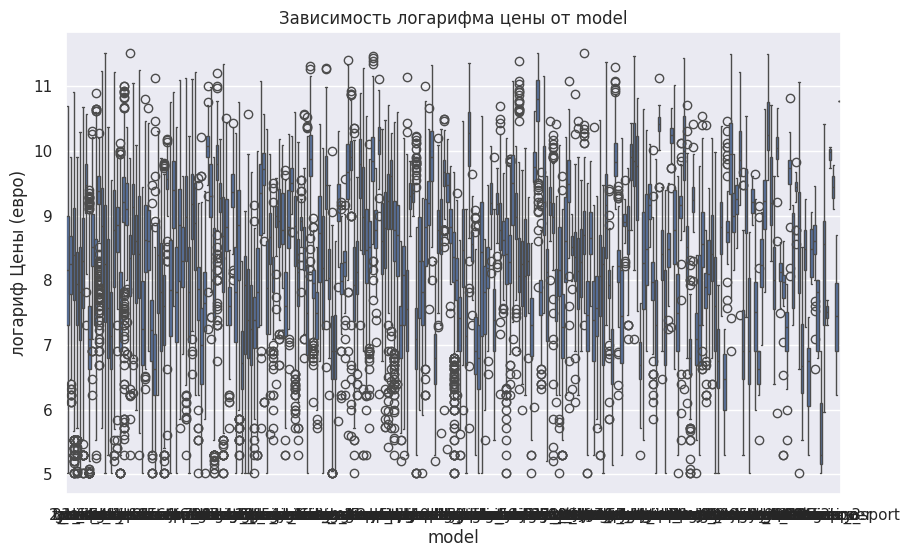

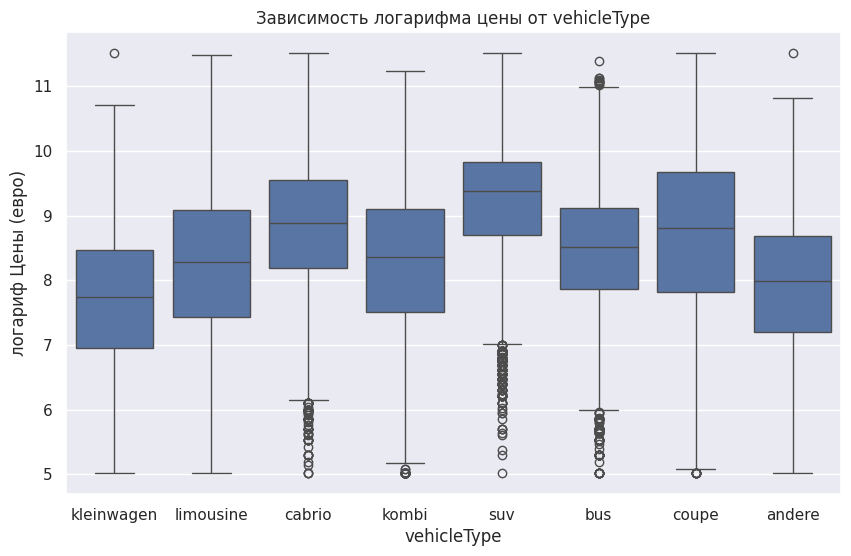

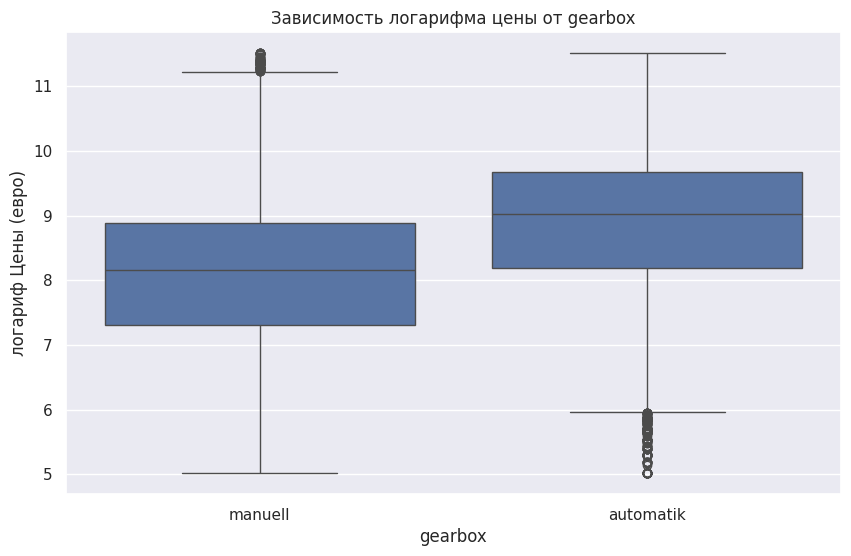

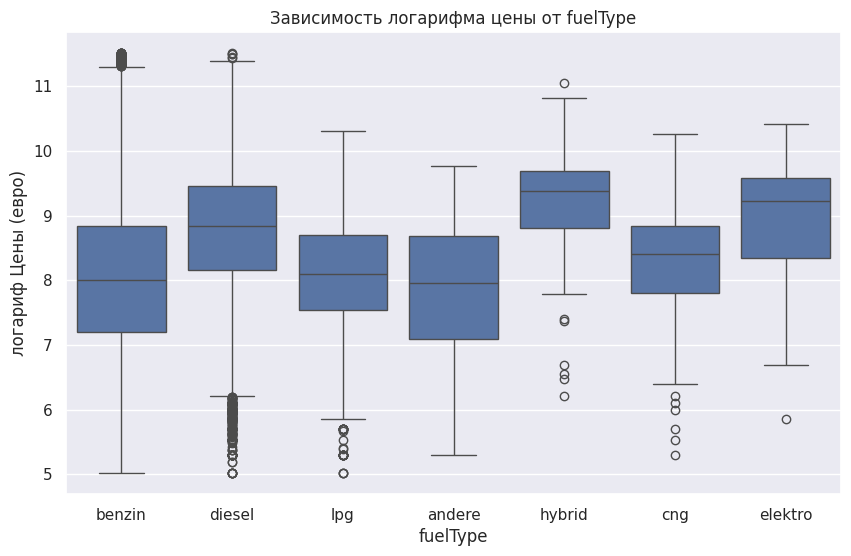

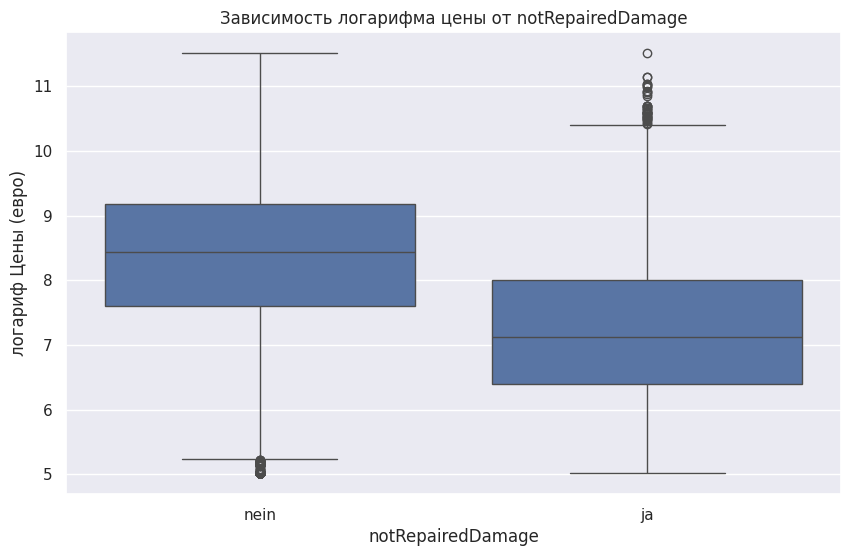

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box(column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column_name, y='log_price', data=filtered_data)
    plt.title(f'Зависимость логарифма цены от {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('логариф Цены (евро)')
    plt.show()

for column in categorical:
    plot_box(column)

Судя по данным графикам, можно сделать следующие выводы: 
Аварии значительно снижают цену
Электро/гибриды цену повышают
автоматическая коробка повышает, но не всегда
кроссоверы(СУВЫ) цену повышают, а вот маленькие стоят дешевле
По моделям и маркам чота нечитаемо, можно с агрегировать и посмотреть на более наглядном


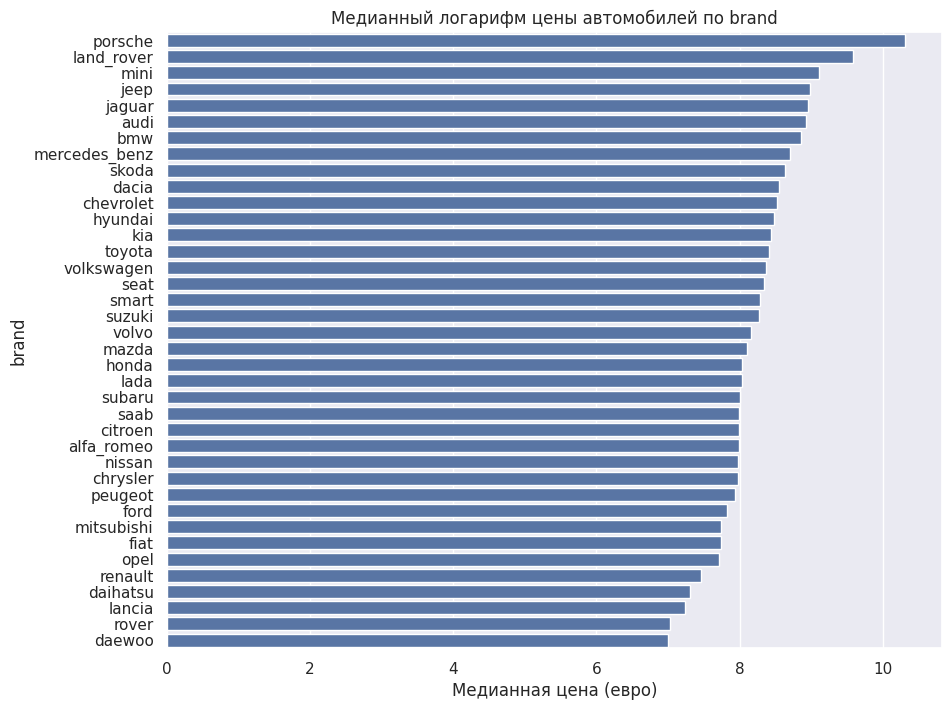

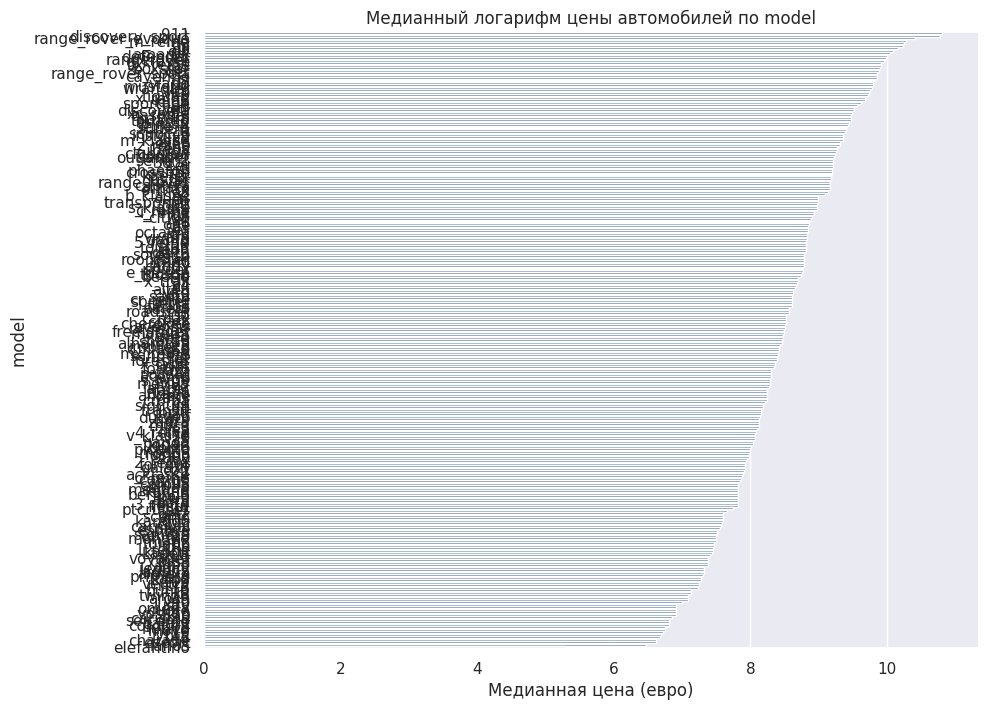

In [143]:
def bar_plot_medium(column, data_to_draw):
    median_prices = data_to_draw.groupby(column)['log_price'].median().sort_values(ascending=False)

    plt.figure(figsize=(10,8))
    sns.barplot(x=median_prices.values, y=median_prices.index)
    plt.title(f'Медианный логарифм цены автомобилей по {column}')
    plt.xlabel('Медианная цена (евро)')
    plt.ylabel(column)
    plt.show()

bar_plot_medium("brand", filtered_data)
bar_plot_medium("model", filtered_data)

In [ ]:
Как видим, премиальные бренды и Dacia стоят дороже. 
А вот график моделей не читаемый, попробуем взять только топ

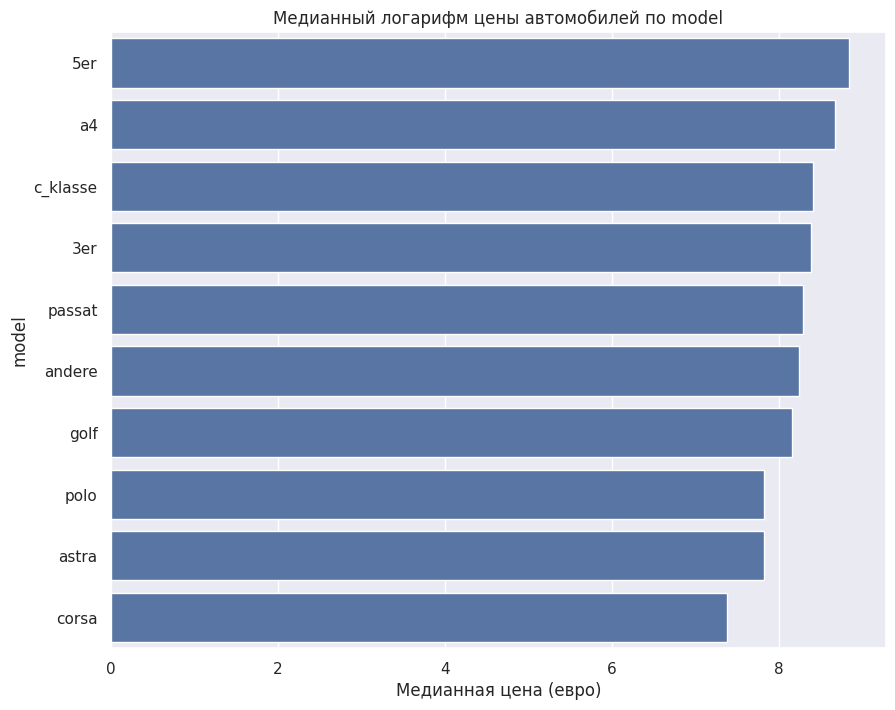

In [144]:
top_models = data['model'].value_counts().head(10).index
top_models_data = data[data['model'].isin(top_models)] 

bar_plot_medium("model", top_models_data)

In [ ]:
bmw, audi, mercedes в топе. Ну ожидаемо. 

В итоге имеем следующее, полезными могут быть: 

мощность, пробег, возраст, марка, наличие ремонта, тип кузова, тип трансмиссии. 

Теперь, определим есть ли выбросы и аномалии. Сначала для численных признаков. 


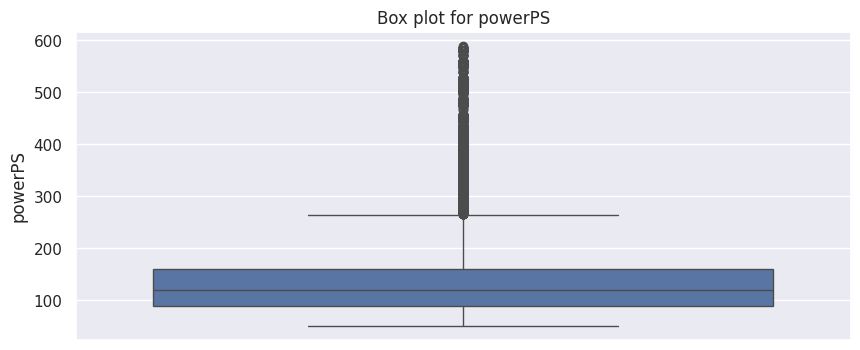

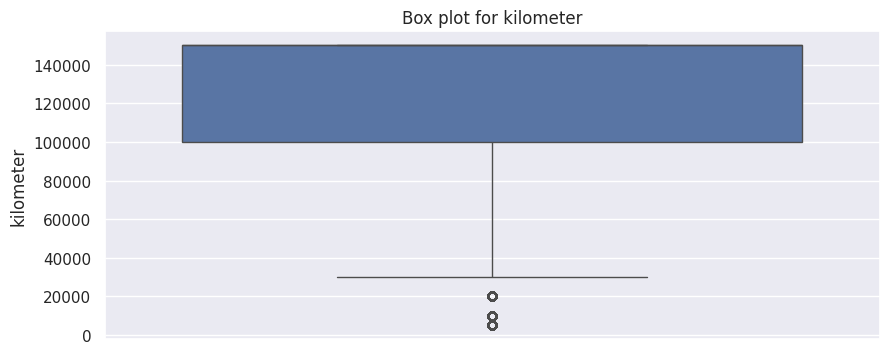

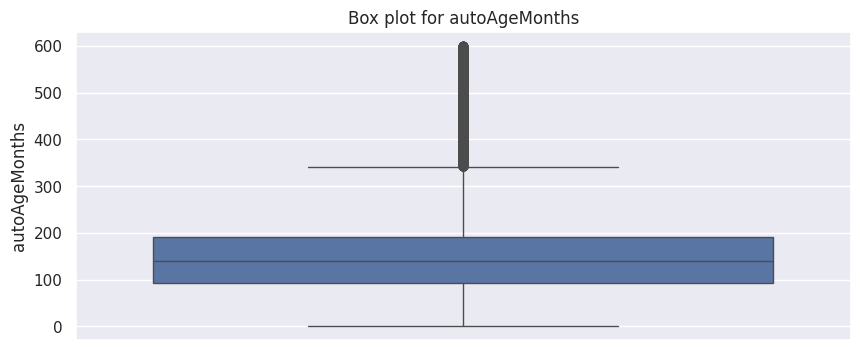

In [145]:
numerical_features = ['powerPS', 'kilometer', 'autoAgeMonths']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(filtered_data[feature])
    plt.title(f'Box plot for {feature}')
    plt.show()

На графиках boxplot видно, что есть значительное количество потенциальных выбросов, особенно для переменных powerPS и autoAgeMonths.

PowerPS: Значения сосредоточены в нижней части диапазона, но есть множество выбросов сверху. Некоторые из этих выбросов достаточно экстремальны (например, значения мощности более 400 PS), что может указывать на спортивные или очень мощные автомобили, либо на ошибки в данных.

Kilometer: Распределение кажется более равномерным, но есть несколько выбросов в нижней части, которые могут указывать на автомобили с очень низким пробегом.

AutoAgeMonths: Также имеются выбросы, особенно в верхней части, указывающие на очень старые автомобили.


Если честно, не кажется что их стоит удалять - так как данные данные могут быть полезны при оценки, и в целом, могут указывать на релевантные признаки. 

In [146]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric =  ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [147]:
filtered_data = filtered_data.copy()
filtered_data['bias'] = 1
other += ['bias']

x = filtered_data[categorical + numeric + other]
y = filtered_data['log_price']

In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [149]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.2, random_state=42)  # random_state для воспроизводимости

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42)

print(f"Обучающая выборка: {x_train.shape}, {y_train.shape}")
print(f"Валидационная выборка: {x_val.shape}, {y_val.shape}")
print(f"Тестовая выборка: {x_test.shape}, {y_test.shape}")

Обучающая выборка: (192319, 61), (192319,)
Валидационная выборка: (24040, 61), (24040,)
Тестовая выборка: (24040, 61), (24040,)


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.

In [150]:
%reload_ext autoreload
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [151]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from linear_regression import test_loading
from descents import LossFunction 

test_loading()
learning_rates = np.logspace(-4, 1, num=6)



The file loaded successfully, last change: 2024-03-26 22:14:17


In [158]:
%autoreload 2

import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

from linear_regression import LinearRegression  
from descents import LossFunction


test_loading()

descents = ["full", "stochastic", "momentum", "adam"]

learning_rates = np.logspace(-4, 1, num=6)

overall_results = []

for descent_name in tqdm(descents, desc=f"Overall Progress", leave=False):
    loss_histories = []
    convergence_iterations = []
    for lr in tqdm(learning_rates, desc=f"Evaluating {descent_name}", leave=True):
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': lr,
                'loss_function': LossFunction.MSE
            }
        }
        model = LinearRegression(descent_config=descent_config, max_iter=5000)
        
        model.fit(x_train, y_train)
        
        train_loss = model.calc_loss(x_train, y_train)
        val_loss = model.calc_loss(x_val, y_val)

        if not math.isnan(train_loss) and not math.isnan(val_loss):
            loss_histories.append((lr, model.loss_history, train_loss, val_loss, r2_train, r2_val))
            convergence_iterations.append(len(model.loss_history))

        r2_train = model.score(x_train, y_train)
        r2_val = model.score(x_val, y_val)

        print(f"Descent name: {descent_name}")
        print(f"Learning rate: {lr}")
        print(f"Train Loss: {train_loss}")
        print(f"Validation Loss: {val_loss}")
        print(f"R^2 on training set: {r2_train}")
        print(f"R^2 on training set: {r2_val}")
        
    
    overall_results.append({
        'descent_name': descent_name,
        'loss_histories': loss_histories,
        'convergence_iterations': convergence_iterations
    })



The file loaded successfully, last change: 2024-03-26 22:14:17


Evaluating full:  17%|█▋        | 1/6 [00:01<00:08,  1.70s/it]

Descent name: full
Learning rate: 0.0001
Train Loss: 28.5158082439923
Validation Loss: 28.558079735111235
R^2 on training set: -22.10304042852829
R^2 on training set: -22.01500351008469



Evaluating full:  33%|███▎      | 2/6 [00:23<00:55, 13.75s/it]

Descent name: full
Learning rate: 0.001
Train Loss: 5.6580961763234106
Validation Loss: 5.692708638887649
R^2 on training set: -3.5840967785873987
R^2 on training set: -3.58776327124007



Evaluating full:  50%|█████     | 3/6 [00:32<00:34, 11.59s/it]

Descent name: full
Learning rate: 0.01
Train Loss: 0.5816664309820903
Validation Loss: 0.5875204366243809
R^2 on training set: 0.528743391878848
R^2 on training set: 0.5265163121408328



Evaluating full:  67%|██████▋   | 4/6 [00:44<00:23, 11.69s/it]

Descent name: full
Learning rate: 0.1
Train Loss: 0.32925703498914743
Validation Loss: 0.3301167224521078
R^2 on training set: 0.7332413471978572
R^2 on training set: 0.7339583894840147



Evaluating full:  83%|████████▎ | 5/6 [00:59<00:12, 12.68s/it]

Descent name: full
Learning rate: 1.0
Train Loss: 0.29682943558506036
Validation Loss: 0.29636934397653486
R^2 on training set: 0.7595136567050085
R^2 on training set: 0.7611554573987929



Overall Progress:  25%|██▌       | 1/4 [01:01<03:04, 61.66s/it]

Gradient Descent produced NaN values
Descent name: full
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0



Evaluating stochastic:  17%|█▋        | 1/6 [00:00<00:03,  1.36it/s]

Descent name: stochastic
Learning rate: 0.0001
Train Loss: 39.12648303592771
Validation Loss: 39.3284602867453
R^2 on training set: -30.699635222354473
R^2 on training set: -30.694870941648894



Evaluating stochastic:  33%|███▎      | 2/6 [00:10<00:23,  5.84s/it]

Descent name: stochastic
Learning rate: 0.001
Train Loss: 8.23105959914693
Validation Loss: 8.274864399560828
R^2 on training set: -5.6686695695809615
R^2 on training set: -5.6687268530600825



Evaluating stochastic:  50%|█████     | 3/6 [00:13<00:14,  4.92s/it]

Descent name: stochastic
Learning rate: 0.01
Train Loss: 0.5932602081977056
Validation Loss: 0.5997016109724788
R^2 on training set: 0.5193503036156689
R^2 on training set: 0.5166994836643108



Evaluating stochastic:  67%|██████▋   | 4/6 [00:24<00:14,  7.27s/it]

Descent name: stochastic
Learning rate: 0.1
Train Loss: 0.32497588352392703
Validation Loss: 0.3256601616636642
R^2 on training set: 0.7367098659414026
R^2 on training set: 0.7375499391659366



Evaluating stochastic:  83%|████████▎ | 5/6 [00:36<00:08,  8.68s/it]

Descent name: stochastic
Learning rate: 1.0
Train Loss: 27.023251353479615
Validation Loss: 27.905748246343524
R^2 on training set: -20.893795300761035
R^2 on training set: -21.489288488522185



Overall Progress:  50%|█████     | 2/4 [01:38<01:34, 47.32s/it]

Gradient Descent produced NaN values
Descent name: stochastic
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0



Evaluating momentum:  17%|█▋        | 1/6 [00:22<01:53, 22.74s/it]

Descent name: momentum
Learning rate: 0.0001
Train Loss: 0.35831977021277944
Validation Loss: 0.3589507804166989
R^2 on training set: 0.7096951954952609
R^2 on training set: 0.7107209746640977



Evaluating momentum:  33%|███▎      | 2/6 [00:45<01:30, 22.60s/it]

Descent name: momentum
Learning rate: 0.001
Train Loss: 0.3047291851868904
Validation Loss: 0.3045911016442502
R^2 on training set: 0.7531134090646568
R^2 on training set: 0.7545295293484243



Evaluating momentum:  50%|█████     | 3/6 [01:07<01:07, 22.44s/it]

Descent name: momentum
Learning rate: 0.01
Train Loss: 0.29534145755915436
Validation Loss: 0.2942462891256986
R^2 on training set: 0.7607191921117248
R^2 on training set: 0.7628664308009724



Evaluating momentum:  67%|██████▋   | 4/6 [01:16<00:34, 17.17s/it]

Descent name: momentum
Learning rate: 0.1
Train Loss: 0.2950531377497926
Validation Loss: 0.29393049400202115
R^2 on training set: 0.7609527840953374
R^2 on training set: 0.76312093061144



Evaluating momentum:  83%|████████▎ | 5/6 [01:18<00:11, 11.71s/it]

Gradient Descent produced NaN values
Descent name: momentum
Learning rate: 1.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0



Overall Progress:  75%|███████▌  | 3/4 [02:58<01:01, 61.96s/it]

Gradient Descent produced NaN values
Descent name: momentum
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0



Evaluating adam:  17%|█▋        | 1/6 [00:22<01:51, 22.37s/it]

Descent name: adam
Learning rate: 0.0001
Train Loss: 4.712056705382527
Validation Loss: 4.720662870658052
R^2 on training set: -2.81763110603416
R^2 on training set: -2.804389985106201



Evaluating adam:  33%|███▎      | 2/6 [00:44<01:28, 22.18s/it]

Descent name: adam
Learning rate: 0.001
Train Loss: 0.29511440614027334
Validation Loss: 0.2940715223206488
R^2 on training set: 0.7609031454496376
R^2 on training set: 0.7630072756571034



Evaluating adam:  50%|█████     | 3/6 [00:49<00:43, 14.34s/it]

Descent name: adam
Learning rate: 0.01
Train Loss: 0.29504471853588304
Validation Loss: 0.293943386940312
R^2 on training set: 0.7609596052044452
R^2 on training set: 0.7631105401712293



Evaluating adam:  67%|██████▋   | 4/6 [00:50<00:18,  9.01s/it]

Descent name: adam
Learning rate: 0.1
Train Loss: 0.2950419962916302
Validation Loss: 0.29394962168706673
R^2 on training set: 0.7609618107221178
R^2 on training set: 0.7631055155785476



Evaluating adam:  83%|████████▎ | 5/6 [00:51<00:06,  6.07s/it]

Descent name: adam
Learning rate: 1.0
Train Loss: 0.29504187551371364
Validation Loss: 0.2939477304020982
R^2 on training set: 0.760961908574406
R^2 on training set: 0.7631070397682197



Evaluating adam: 100%|██████████| 6/6 [00:52<00:00,  8.71s/it]
                                                               

Descent name: adam
Learning rate: 10.0
Train Loss: 0.2950418675408513
Validation Loss: 0.2939456817916366
R^2 on training set: 0.7609619150338884
R^2 on training set: 0.7631086907467659


In [159]:
for result in overall_results:
    combined_results = [
        (
            lr,  
            history, 
            train_loss,  
            val_loss,  
            iterations, 
            r2_train,  
            r2_val  
        ) for (lr, history, train_loss, val_loss, r2_train, r2_val), iterations in zip(result['loss_histories'], result['convergence_iterations'])
    ]
    
    best_lr, best_history, best_train_loss, best_val_loss, best_iterations, best_r2_train, best_r2_val = min(
        combined_results,
        key=lambda x: x[3]  
    )
    
    descent_name = result['descent_name']
    print(f"Лучшие результаты для метода {descent_name}:")
    print(f"Оптимальное значение λ: {best_lr}")
    print(f"Потеря на тренировочной выборке: {best_train_loss}")
    print(f"Потеря на валидационной выборке: {best_val_loss}")
    print(f"Количество итераций до сходимости: {best_iterations}")
    print(f"R^2 на тренировочной выборке: {best_r2_train}")
    print(f"R^2 на валидационной выборке: {best_r2_val}\n")


Лучшие результаты для метода full:
Оптимальное значение λ: 1.0
Потеря на тренировочной выборке: 0.29682943558506036
Потеря на валидационной выборке: 0.29636934397653486
Количество итераций до сходимости: 3231
R^2 на тренировочной выборке: 0.7332413471978572
R^2 на валидационной выборке: 0.7339583894840147

Лучшие результаты для метода stochastic:
Оптимальное значение λ: 0.1
Потеря на тренировочной выборке: 0.32497588352392703
Потеря на валидационной выборке: 0.3256601616636642
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.5193503036156689
R^2 на валидационной выборке: 0.5166994836643108

Лучшие результаты для метода momentum:
Оптимальное значение λ: 0.1
Потеря на тренировочной выборке: 0.2950531377497926
Потеря на валидационной выборке: 0.29393049400202115
Количество итераций до сходимости: 2037
R^2 на тренировочной выборке: 0.7607191921117248
R^2 на валидационной выборке: 0.7628664308009724

Лучшие результаты для метода adam:
Оптимальное значение λ: 0.01
Поте

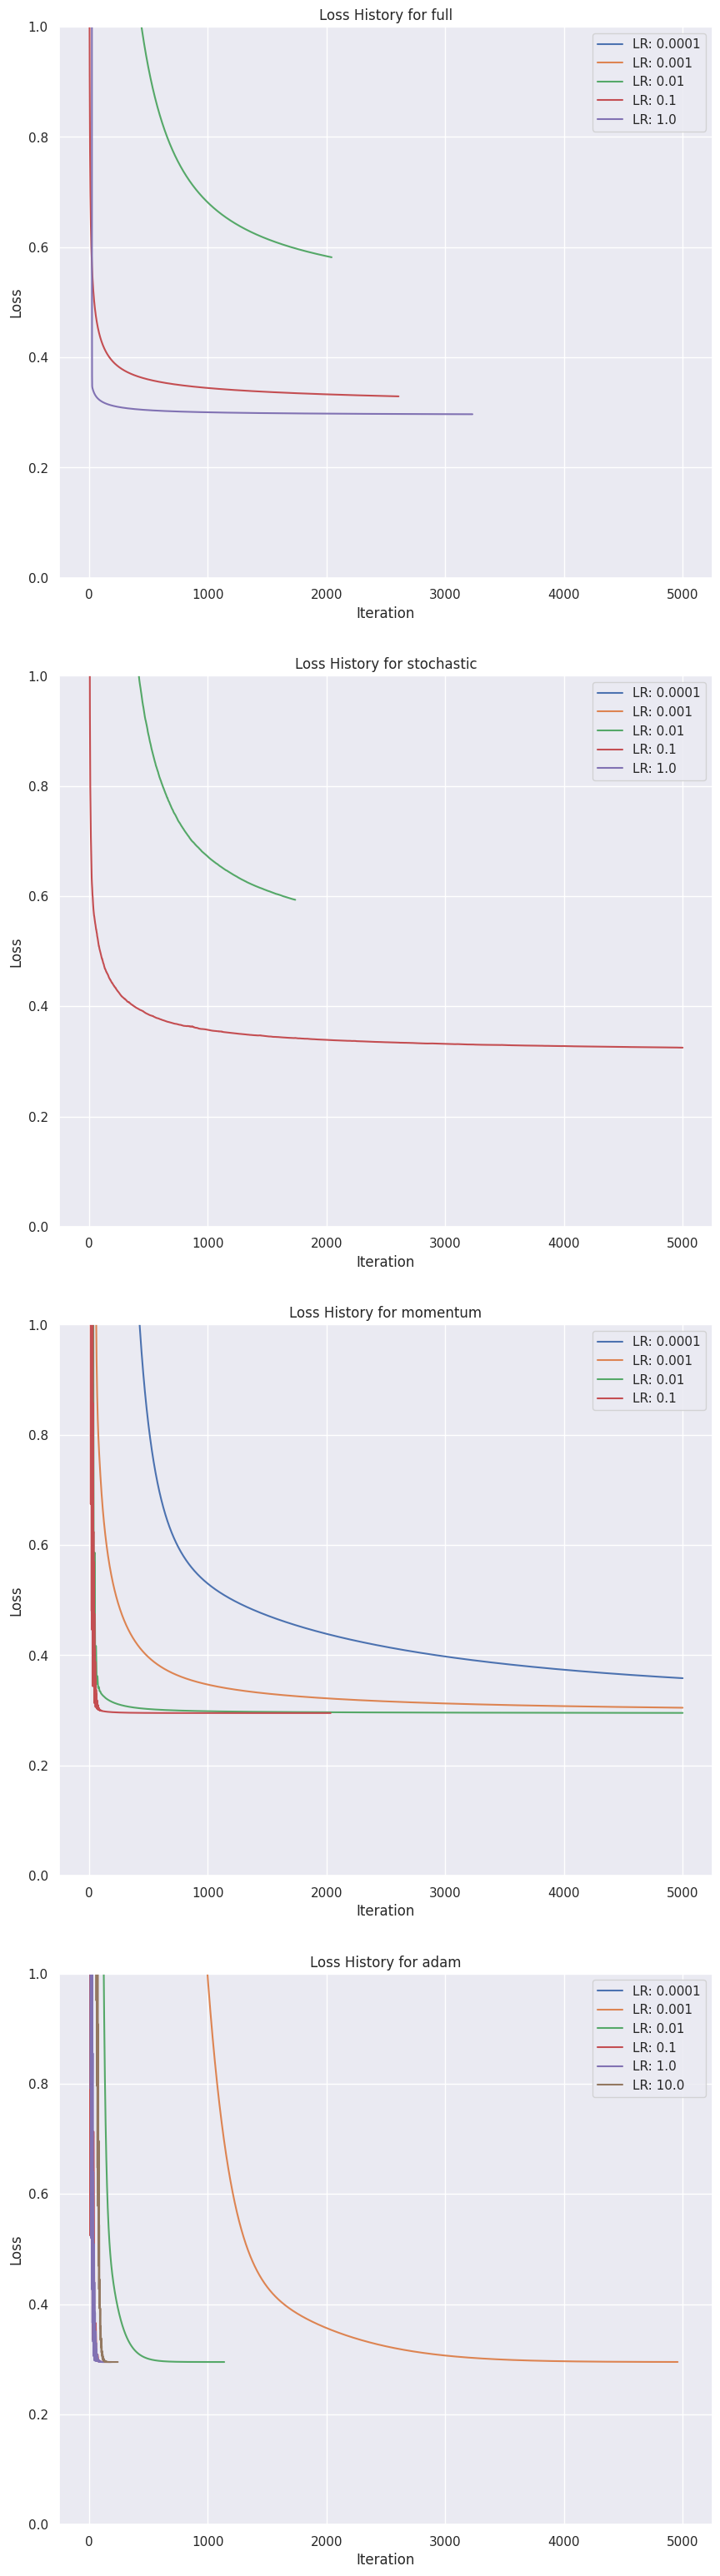

In [161]:
fig, axes = plt.subplots(len(descents), 1, figsize=(10, 8*len(descents)))
fig.tight_layout(pad=5.0)

for i, result in enumerate(overall_results):
    for lr, history, _, _, _, _ in result['loss_histories']:
        axes[i].plot(history, label=f'LR: {lr}')
    axes[i].set_title(f'Loss History for {result["descent_name"]}')
    axes[i].set_xlabel('Iteration')
    axes[i].set_ylabel('Loss')
    axes[i].set_ylim([0, 1])
    axes[i].legend()

plt.show()


### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

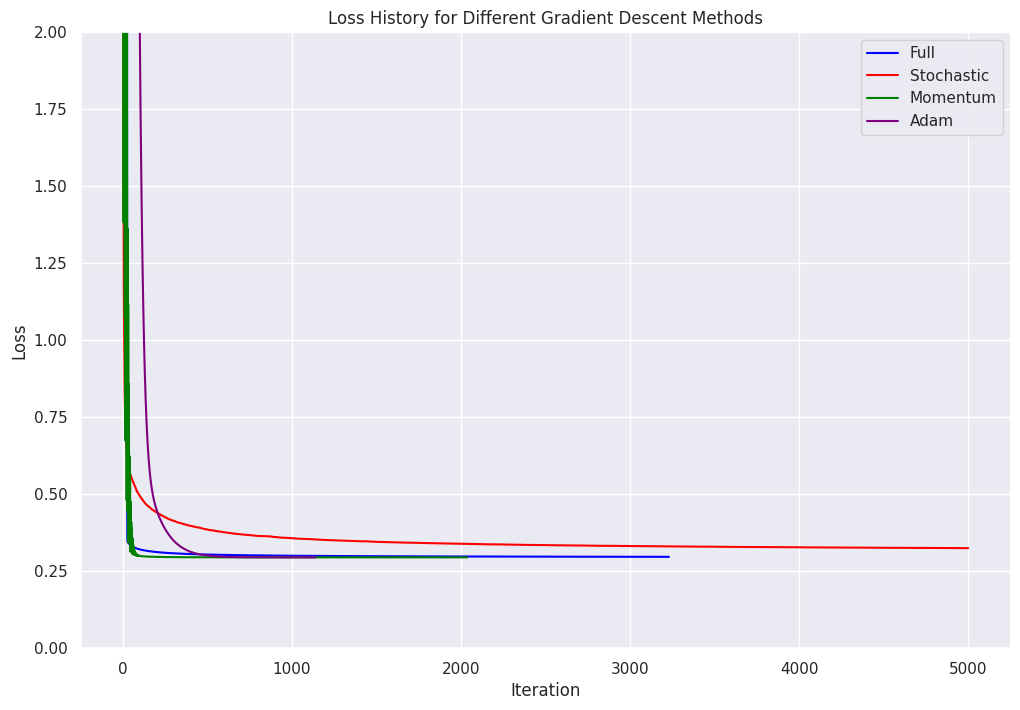

In [166]:
import matplotlib.pyplot as plt

loss_history_full = []
loss_history_stochastic = []
loss_history_momentum = []
loss_history_adam = []

for result in overall_results:
    optimal_loss_history = min(result['loss_histories'], key=lambda x: x[3])[1]  # x[3] это val_loss
    
    if result['descent_name'] == 'full':
        loss_history_full = optimal_loss_history
    elif result['descent_name'] == 'stochastic':
        loss_history_stochastic = optimal_loss_history
    elif result['descent_name'] == 'momentum':
        loss_history_momentum = optimal_loss_history
    elif result['descent_name'] == 'adam':
        loss_history_adam = optimal_loss_history

iterations_full = range(len(loss_history_full))
iterations_stochastic = range(len(loss_history_stochastic))
iterations_momentum = range(len(loss_history_momentum))
iterations_adam = range(len(loss_history_adam))

plt.figure(figsize=(12, 8))

plt.plot(iterations_full, loss_history_full, label='Full', color='blue')
plt.plot(iterations_stochastic, loss_history_stochastic, label='Stochastic', color='red')
plt.plot(iterations_momentum, loss_history_momentum, label='Momentum', color='green')
plt.plot(iterations_adam, loss_history_adam, label='Adam', color='purple')

plt.title('Loss History for Different Gradient Descent Methods')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.ylim(0, 2)

plt.show()


## Выводы

Full Method
Показывает весьма неплохие результаты как по качеству, так и по скорости сходимости.
С R^2 около 0.73 и 3231 итерацией до сходимости, он неплох, но есть более быстрые методы.
Stochastic Method: Здесь самое медленное обучение из всех и самые низкие показатели R^2. Скорее всего, не лучший выбор для задачи. 
Momentum Method: Существенное улучшение по скорости сходимости по сравнению с Full методом. С R^2 около 0.76 и всего 2037 итерациями до сходимости, он выглядит очень и очень соблазнительно.
Adam Method: Самый быстрый из всех с 1141 итерацией и при этом предлагает наилучшее качество предсказаний с R^2 около 0.76. 

Adam выделяется как наиболее эффективный метод, учитывая оба критерия — скорость сходимости и качество предсказаний. Momentum тоже показывает себя очень хорошо, но Adam чуть опережает его по скорости обучения, сохраняя при этом высокое качество предсказаний.

Интересно, что для достижения наилучших результатов в разных методах требуются разные значения λ, что подчеркивает важность тонкой настройки гиперпараметров для конкретного метода оптимизации.



## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

Batch size: 1
Iteration: 0, time: 1.5030081272125244, reached convergence: 642
Iteration: 1, time: 0.9895541667938232, reached convergence: 433
Iteration: 2, time: 1.147472858428955, reached convergence: 498
Iteration: 3, time: 1.0832672119140625, reached convergence: 448
Iteration: 4, time: 0.5591387748718262, reached convergence: 242
Iteration: 5, time: 0.7944035530090332, reached convergence: 328
Iteration: 6, time: 0.2253274917602539, reached convergence: 93
Iteration: 7, time: 0.7590973377227783, reached convergence: 321
Iteration: 8, time: 0.6068549156188965, reached convergence: 251
Iteration: 9, time: 0.7681055068969727, reached convergence: 322
Batch size: 2
Iteration: 0, time: 2.4801931381225586, reached convergence: 1067
Iteration: 1, time: 8.743008375167847, reached convergence: 3744
Iteration: 2, time: 5.059569358825684, reached convergence: 2186
Iteration: 3, time: 10.210652589797974, reached convergence: 4459
Iteration: 4, time: 6.223647594451904, reached convergence: 27

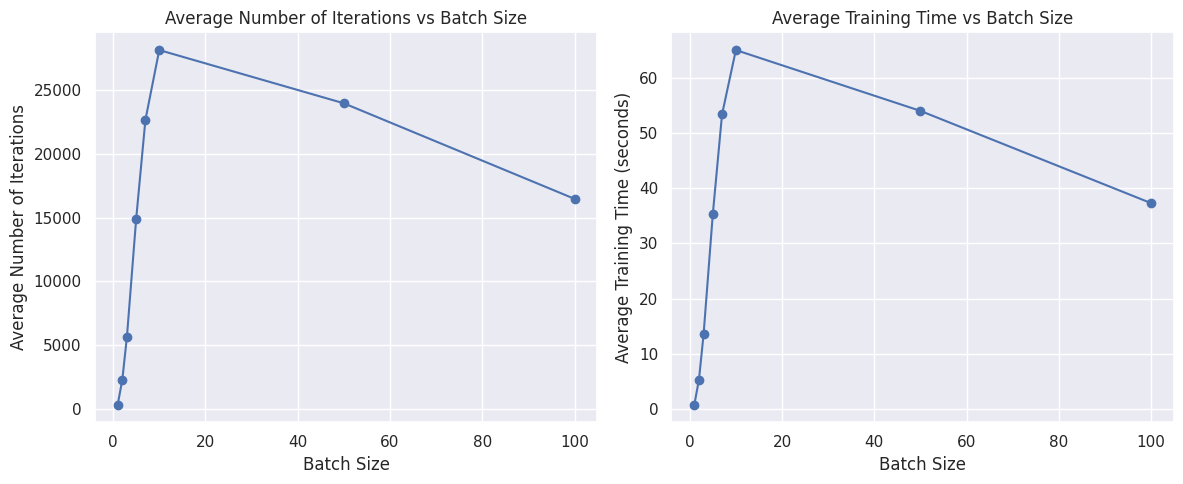

In [172]:
batch_sizes = np.arange(5, 500, 10)

import numpy as np
import time
import matplotlib.pyplot as plt

# Выбор размеров батча для исследования
batch_sizes = [1, 2, 3, 5, 7, 10, 50, 100]

n_runs = 10

avg_times = []
avg_iterations = []

for batch_size in batch_sizes:
    times = []
    iterations = []

    print(f"Batch size: {batch_size}")
    
    for iteration in range(n_runs):
        
        start_time = time.time()
        
        descent_config = {
            'descent_name': 'stochastic',  
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': 0.1,  # Лучшая лямбда, найденная в задании 5 для стохастика
                'loss_function': LossFunction.MSE,
                'batch_size': batch_size  
            }
        }
        
        model = LinearRegression(descent_config=descent_config, max_iter=100000)
        model.fit(x_train, y_train)
        
        end_time = time.time()

        time_elapsed = end_time - start_time
        convergence = len(model.loss_history)

        print(f"Iteration: {iteration}, time: {time_elapsed}, reached convergence: {convergence}")
        
        times.append(time_elapsed)
        iterations.append(convergence)
    
    avg_times.append(np.mean(times))
    avg_iterations.append(np.mean(iterations))

# Построение графиков
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(batch_sizes, avg_iterations, '-o')
plt.xlabel('Batch Size')
plt.ylabel('Average Number of Iterations')
plt.title('Average Number of Iterations vs Batch Size')

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, avg_times, '-o')
plt.xlabel('Batch Size')
plt.ylabel('Average Training Time (seconds)')
plt.title('Average Training Time vs Batch Size')

plt.tight_layout()
plt.show()


Меньшие батчи обеспечивают более частое обновление модели, что может привести к быстрой сходимости, но с шансом застрять в локальных минимумах или сильно колебаться вокруг минимума.

Большие батчи сглаживают процесс обновления, делая сходимость более предсказуемой и стабильной, но требуя больше времени и памяти на каждое обновление. Ну и плюслм слишком большие батчи значительно замедляют обучение, так как модель обновляется реже.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [179]:
%autoreload 2

import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

from linear_regression import LinearRegression  
from descents import LossFunction


test_loading()

descents = ["full", "stochastic", "momentum", "adam"]

learning_rates = np.logspace(-4, 1, num=6)
mu_variants = np.logspace(-4, 1, num=6)

overall_results = []

for descent_name in tqdm(descents, desc=f"Overall Progress", leave=False):
    loss_histories = []
    convergence_iterations = []

    for mu in mu_variants:
        for lr in learning_rates:
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {
                    'dimension': x_train.shape[1],
                    'lambda_': lr,
                    'mu': mu,
                    'loss_function': LossFunction.MSE
                }
            }
            model = LinearRegression(descent_config=descent_config, max_iter=5000)
            
            model.fit(x_train, y_train)
            
            train_loss = model.calc_loss(x_train, y_train)
            val_loss = model.calc_loss(x_val, y_val)

            r2_train = model.score(x_train, y_train)
            r2_val = model.score(x_val, y_val)
    
            if not math.isnan(train_loss) and not math.isnan(val_loss):
                loss_histories.append((lr, mu, model.loss_history, train_loss, val_loss, r2_train, r2_val))
                convergence_iterations.append(len(model.loss_history))
    
            print(f"Descent name: {descent_name}")
            print(f"Mu: {mu}")
            print(f"Learning rate: {lr}")
            print(f"Train Loss: {train_loss}")
            print(f"Validation Loss: {val_loss}")
            print(f"R^2 on training set: {r2_train}")
            print(f"R^2 on training set: {r2_val}")
        
    
    overall_results.append({
        'descent_name': descent_name,
        'loss_histories': loss_histories,
        'convergence_iterations': convergence_iterations
    })

The file loaded successfully, last change: 2024-03-27 20:20:31


Overall Progress:   0%|          | 0/4 [00:00<?, ?it/s]

Descent name: full
Mu: 0.0001
Learning rate: 0.0001
Train Loss: 29.696547751845763
Validation Loss: 29.82586377413063
R^2 on training set: -23.05965622395279
R^2 on training set: -23.036712755898836
Descent name: full
Mu: 0.0001
Learning rate: 0.001
Train Loss: 6.451907884240134
Validation Loss: 6.498196793565587
R^2 on training set: -4.227230012747188
R^2 on training set: -4.236907502196611
Descent name: full
Mu: 0.0001
Learning rate: 0.01
Train Loss: 0.663630998399394
Validation Loss: 0.668992464249338
R^2 on training set: 0.4623370428619743
R^2 on training set: 0.4608578708466602
Descent name: full
Mu: 0.0001
Learning rate: 0.1
Train Loss: 0.32943243130608374
Validation Loss: 0.32872672830115734
R^2 on training set: 0.7330992439768464
R^2 on training set: 0.7350785880603844
Descent name: full
Mu: 0.0001
Learning rate: 1.0
Train Loss: 0.29826791067909925
Validation Loss: 0.29747051372918987
R^2 on training set: 0.7583482277622741
R^2 on training set: 0.7602680228808691


/app/ml_labs/lab4/descents.py:297: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * x.T.dot(error) / len(y)
/app/ml_labs/lab4/descents.py:275: RuntimeWarning: invalid value encountered in add
  self.w += weight_diff


Gradient Descent produced NaN values
Descent name: full
Mu: 0.0001
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0
Descent name: full
Mu: 0.001
Learning rate: 0.0001
Train Loss: 33.99324051547967
Validation Loss: 34.07331811061518
R^2 on training set: -26.540766272731172
R^2 on training set: -26.45974320366839
Descent name: full
Mu: 0.001
Learning rate: 0.001
Train Loss: 7.18025112542932
Validation Loss: 7.230191633517891
R^2 on training set: -4.817321768276656
R^2 on training set: -4.826823349730068
Descent name: full
Mu: 0.001
Learning rate: 0.01
Train Loss: 0.5574415877187767
Validation Loss: 0.5641596859680895
R^2 on training set: 0.5483699628144625
R^2 on training set: 0.5453427795833108
Descent name: full
Mu: 0.001
Learning rate: 0.1
Train Loss: 0.32885468365815823
Validation Loss: 0.33005662535619423
R^2 on training set: 0.733567325651169
R^2 on training set: 0.7340068218326259
Descent name: full
Mu: 0.001
Learning rate:

Overall Progress:  25%|██▌       | 1/4 [06:09<18:29, 369.68s/it]

Gradient Descent produced NaN values
Descent name: full
Mu: 10.0
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0
Descent name: stochastic
Mu: 0.0001
Learning rate: 0.0001
Train Loss: 25.562337843756005
Validation Loss: 25.72513195706689
R^2 on training set: -19.710187121433396
R^2 on training set: -19.73192622826677
Descent name: stochastic
Mu: 0.0001
Learning rate: 0.001
Train Loss: 6.156383921305961
Validation Loss: 6.172799689849407
R^2 on training set: -3.9878013419955707
R^2 on training set: -3.974669440195833
Descent name: stochastic
Mu: 0.0001
Learning rate: 0.01
Train Loss: 0.5974279778484777
Validation Loss: 0.601865180215344
R^2 on training set: 0.5159736449597156
R^2 on training set: 0.5149558596468446
Descent name: stochastic
Mu: 0.0001
Learning rate: 0.1
Train Loss: 0.32799586502403305
Validation Loss: 0.3291921083166261
R^2 on training set: 0.7342631264313958
R^2 on training set: 0.73470353753917
Descent name: sto

/app/ml_labs/lab4/descents.py:349: RuntimeWarning: overflow encountered in multiply
  gradient = 2 * x_batch.T.dot(errors) / self.batch_size


Gradient Descent produced NaN values
Descent name: stochastic
Mu: 0.0001
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0
Descent name: stochastic
Mu: 0.001
Learning rate: 0.0001
Train Loss: 32.29493539836362
Validation Loss: 32.38249173713138
R^2 on training set: -25.164827304247797
R^2 on training set: -25.097103443515692
Descent name: stochastic
Mu: 0.001
Learning rate: 0.001
Train Loss: 7.671030237687327
Validation Loss: 7.708888075914711
R^2 on training set: -5.214942960527545
R^2 on training set: -5.212605601345626
Descent name: stochastic
Mu: 0.001
Learning rate: 0.01
Train Loss: 0.584595678511968
Validation Loss: 0.5870559092161549
R^2 on training set: 0.5263701635442737
R^2 on training set: 0.5268906755444656
Descent name: stochastic
Mu: 0.001
Learning rate: 0.1
Train Loss: 0.32503090103851334
Validation Loss: 0.3270586331112765
R^2 on training set: 0.7366652916528926
R^2 on training set: 0.7364229087222202
Descent name

Overall Progress:  50%|█████     | 2/4 [10:45<10:28, 314.39s/it]

Gradient Descent produced NaN values
Descent name: stochastic
Mu: 10.0
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0
Descent name: momentum
Mu: 0.0001
Learning rate: 0.0001
Train Loss: 0.3822992719513385
Validation Loss: 0.3851373857995467
R^2 on training set: 0.6902673962415395
R^2 on training set: 0.6896171462416822
Descent name: momentum
Mu: 0.0001
Learning rate: 0.001
Train Loss: 0.30323833483948476
Validation Loss: 0.3027517274094149
R^2 on training set: 0.7543212715791712
R^2 on training set: 0.7560118840747838
Descent name: momentum
Mu: 0.0001
Learning rate: 0.01
Train Loss: 0.2953000054588709
Validation Loss: 0.29411062162141727
R^2 on training set: 0.7607527759239212
R^2 on training set: 0.762975765466195
Descent name: momentum
Mu: 0.0001
Learning rate: 0.1
Train Loss: 0.2950547112433479
Validation Loss: 0.2939543602123893
R^2 on training set: 0.7609515092766505
R^2 on training set: 0.763101696793183


/app/ml_labs/lab4/descents.py:413: RuntimeWarning: invalid value encountered in add
  self.h = self.alpha * self.h + eta_k * gradient


Gradient Descent produced NaN values
Descent name: momentum
Mu: 0.0001
Learning rate: 1.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0
Gradient Descent produced NaN values
Descent name: momentum
Mu: 0.0001
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0
Descent name: momentum
Mu: 0.001
Learning rate: 0.0001
Train Loss: 0.37275185141581074
Validation Loss: 0.37375646289765013
R^2 on training set: 0.6980025598649284
R^2 on training set: 0.6987890507592369
Descent name: momentum
Mu: 0.001
Learning rate: 0.001
Train Loss: 0.3034050613525599
Validation Loss: 0.30407279381667146
R^2 on training set: 0.7541861924911396
R^2 on training set: 0.7549472344806207
Descent name: momentum
Mu: 0.001
Learning rate: 0.01
Train Loss: 0.2957026429558348
Validation Loss: 0.2946163093506182
R^2 on training set: 0.7604265656236272
R^2 on training set: 0.7625682308920738
Descent name: momentum
Mu: 0.001
Learni

Overall Progress:  75%|███████▌  | 3/4 [16:27<05:26, 326.87s/it]

Gradient Descent produced NaN values
Descent name: momentum
Mu: 10.0
Learning rate: 10.0
Train Loss: nan
Validation Loss: nan
R^2 on training set: 1.0
R^2 on training set: 1.0
Descent name: adam
Mu: 0.0001
Learning rate: 0.0001
Train Loss: 14.911489031402455
Validation Loss: 15.019470843889184
R^2 on training set: -11.081043994768283
R^2 on training set: -11.104216298784621
Descent name: adam
Mu: 0.0001
Learning rate: 0.001
Train Loss: 0.2951815844434848
Validation Loss: 0.29423324260652295
R^2 on training set: 0.7608487186895144
R^2 on training set: 0.7628769450122712
Descent name: adam
Mu: 0.0001
Learning rate: 0.01
Train Loss: 0.2951057252120056
Validation Loss: 0.2940243611514602
R^2 on training set: 0.7609101785954285
R^2 on training set: 0.763045282921054
Descent name: adam
Mu: 0.0001
Learning rate: 0.1
Train Loss: 0.2952282251439909
Validation Loss: 0.2940553845934286
R^2 on training set: 0.7608109311584654
R^2 on training set: 0.7630202810780582
Descent name: adam
Mu: 0.0001
Le

Descent name: adam
Mu: 10.0
Learning rate: 10.0
Train Loss: 26.264205336010264
Validation Loss: 26.280815808709512
R^2 on training set: -20.278828659147347
R^2 on training set: -20.179752759835996


In [194]:
for result in overall_results:
    combined_results = [
        (
            lr,
            mu,
            history, 
            train_loss,  
            val_loss,  
            iterations, 
            r2_train,  
            r2_val  
        ) for (lr, mu, history, train_loss, val_loss, r2_train, r2_val), iterations in zip(result['loss_histories'], result['convergence_iterations'])
    ]
    
    best_lr, best_mu, best_history, best_train_loss, best_val_loss, best_iterations, best_r2_train, best_r2_val = min(
        combined_results,
        key=lambda x: x[4]  
    )
    
    descent_name = result['descent_name']
    print(f"Лучшие результаты для метода {descent_name}:")
    print(f"Оптимальное значение λ: {best_lr}")
    print(f"Оптимальное значение Mu: {best_mu}")
    print(f"Потеря на тренировочной выборке: {best_train_loss}")
    print(f"Потеря на валидационной выборке: {best_val_loss}")
    print(f"Количество итераций до сходимости: {best_iterations}")
    print(f"R^2 на тренировочной выборке: {best_r2_train}")
    print(f"R^2 на валидационной выборке: {best_r2_val}\n")

Лучшие результаты для метода full:
Оптимальное значение λ: 1.0
Оптимальное значение Mu: 0.001
Потеря на тренировочной выборке: 0.29698157805556175
Потеря на валидационной выборке: 0.2960702468654218
Количество итераций до сходимости: 2958
R^2 на тренировочной выборке: 0.7593903933692189
R^2 на валидационной выборке: 0.7613965002534235

Лучшие результаты для метода stochastic:
Оптимальное значение λ: 0.1
Оптимальное значение Mu: 0.01
Потеря на тренировочной выборке: 0.32547405302265614
Потеря на валидационной выборке: 0.32611153233319334
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.7363062571791709
R^2 на валидационной выборке: 0.7371861787996963

Лучшие результаты для метода momentum:
Оптимальное значение λ: 0.1
Оптимальное значение Mu: 0.0001
Потеря на тренировочной выборке: 0.2950547112433479
Потеря на валидационной выборке: 0.2939543602123893
Количество итераций до сходимости: 5001
R^2 на тренировочной выборке: 0.7609515092766505
R^2 на валидационной выбор

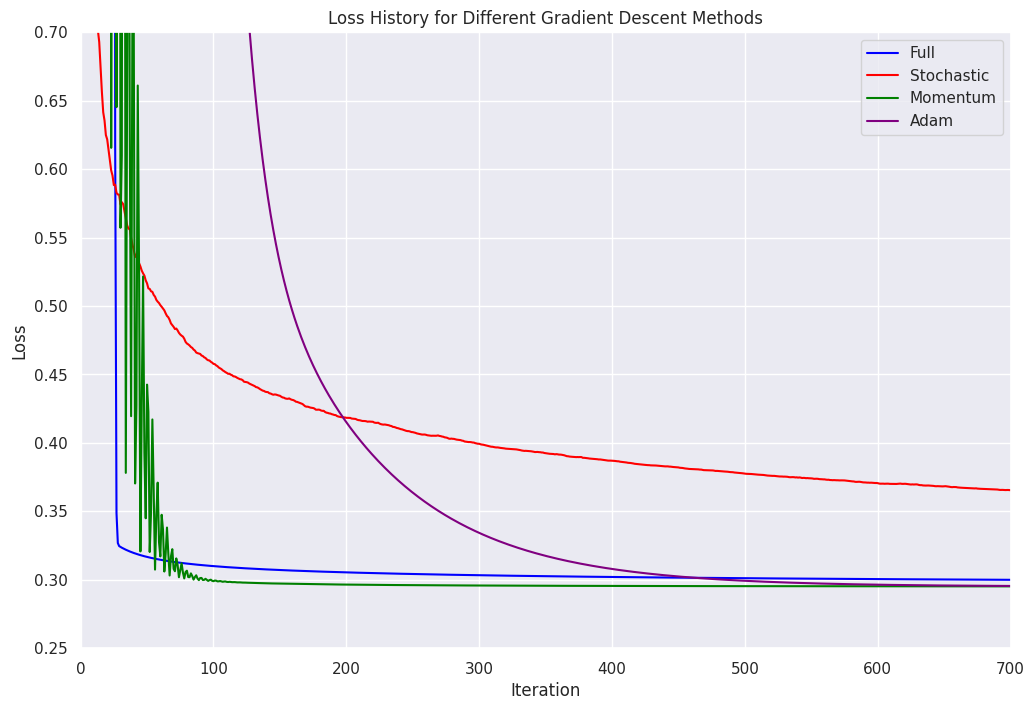

In [206]:
import matplotlib.pyplot as plt

loss_history_full = []
loss_history_stochastic = []
loss_history_momentum = []
loss_history_adam = []

for result in overall_results:
    optimal_loss_history = min(result['loss_histories'], key=lambda x: x[4])[2]  # x[4] это val_loss

    if result['descent_name'] == 'full':
        loss_history_full = optimal_loss_history
    elif result['descent_name'] == 'stochastic':
        loss_history_stochastic = optimal_loss_history
    elif result['descent_name'] == 'momentum':
        loss_history_momentum = optimal_loss_history
    elif result['descent_name'] == 'adam':
        loss_history_adam = optimal_loss_history

# print(loss_history_full)
iterations_full = range(len(loss_history_full))
iterations_stochastic = range(len(loss_history_stochastic))
iterations_momentum = range(len(loss_history_momentum))
iterations_adam = range(len(loss_history_adam))

plt.figure(figsize=(12, 8))

plt.plot(iterations_full, loss_history_full, label='Full', color='blue')
plt.plot(iterations_stochastic, loss_history_stochastic, label='Stochastic', color='red')
plt.plot(iterations_momentum, loss_history_momentum, label='Momentum', color='green')
plt.plot(iterations_adam, loss_history_adam, label='Adam', color='purple')

plt.title('Loss History for Different Gradient Descent Methods')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.ylim(0.25, 0.7)
plt.xlim(0, 700)


plt.show()

Метод full: После применения регуляризации наблюдается небольшое увеличение R2 как на тренировочной, так и на валидационной выборке. Это указывает на то, что регуляризация помогла модели немного лучше обобщать данные. Также количество итераций до сходимости сократилось, что может свидетельствовать о более эффективном процессе обучения.

Метод stochastic: Здесь регуляриция значительно все улучшила, значительно улучшив 
R2 на тренировочной и валидационной выборках. 

Методы momentum и adam: Для этих методов результаты до и после применения регуляризации остались схожими, с небольшим улучшением обобщающей способности.

Это может говорить о том, что оба метода уже были достаточно хороши в минимизации переобучения, и дополнительная регуляризация принесла лишь небольшие улучшения. 
Однака, сходимость выросла после введения регуляризации.

Регуляризация наиболее эффективна, когда методы обучения подвержены риску переобучения, как это было показано на примере стохастик-метода. Там, где переобучение было значительной проблемой, регуляризация дала ощутимое улучшение.

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ